2.7005e-09
1.4074000000000001e-09
1.8305999999999999e-09
8.432e-10
2.1312e-09
5.29e-10
2.6480100000000002e-09
1.6897e-09
3.671e-10
4.485e-10
5.495729999999999e-09
4.1299999999999997e-10
5.5176e-09
1.7439000000000002e-09
5.997e-10
5e-10
6.629e-10


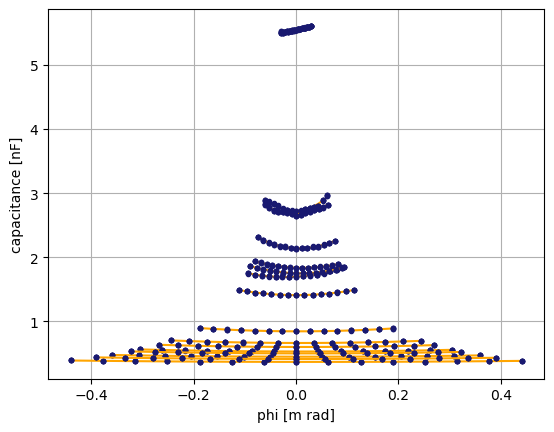

<Figure size 640x480 with 0 Axes>

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import sympy as sp
import time
import os
import statistics


#from AH2550A import AH2550A
#from AbsorberAttractorAssembly import *


filename_all_phi = 'Merge_'+'phi_'+time.strftime('%Y%m%d_%H%M%S')
dAdB_phi = 'dAdB_'+'phi_'+time.strftime('%Y%m%d_%H%M%S')
filename_all_theta = 'Merge_'+'theta_'+time.strftime('%Y%m%d_%H%M%S')

savedirectory = '..\\Data\\'+time.strftime("%Y%m%d")+'\\'
if not os.path.isdir(savedirectory): os.mkdir(savedirectory)

epsilon = 8.8541878128e-12 
r = 1.25/2*2.54/100   #0.015875

#/Data/alignment_data/nicedata
#/tree/mossbauer_notebooks/plate_alignment/meeting

#put all plots into the same directory for phi
#then load the directory
loaddirectory_phi = '..//..//Data//alignment_data//nicedata//phi//' 
#list all files in the directory
files_phi = os.listdir(loaddirectory_phi)
#iterate over files
i=0
dA_phi = []
dB_phi = []
X_s_phi =[]
X_c_phi = []
ddA_phi = []
ddB_phi = []
for filename in files_phi:
    dataphi_i = np.transpose(np.load(loaddirectory_phi+filename))
    #just get the data to plot
    x1_i, x2_i, x3_i, phi_i, c_i, l_i, v_i = dataphi_i
    # print('x1_i', len(x1_i), x1_i)
    #fit for the data
    #fitting function
    def func(angle, A, B, angle_0):
        return A + B*(angle-angle_0)**2
    initial_guess = [0, 0, 0]

    #fit the data to the points
    parameters, covariance = curve_fit(func, phi_i, c_i, p0=initial_guess)

    #get fitted parameters
    A_fit_i, B_fit_i, angle_0_fit_i = parameters


    cA  = epsilon*math.pi*r**2
    cB = (epsilon*math.pi*r**4/4)**(1/3)

    dA_phi.append(cA/A_fit_i)
    dB_phi.append(cB/B_fit_i**(1/3))
    ddA_phi.append(cA/A_fit_i**2*np.sqrt(covariance[0,0]))
    ddB_phi.append(cB/(3*B_fit_i**(2/3))*np.sqrt(covariance[1,1]))


    plt.plot(phi_i*1e3, func(phi_i, A_fit_i, B_fit_i, angle_0_fit_i)*1e9, color = 'orange')

    plt.plot(phi_i*1e3, c_i*1e9,'.', color = 'midnightblue') #label= '${:.2f} \mu m $'.format(dA_phi[-1]*1e6)
    print(np.min(c_i))

    plt.xlabel('phi [m rad]')
    plt.ylabel('capacitance [nF]')
    #plt.yscale('log')
    # plt.legend()
    plt.grid()
   
    

    i+=1
plt.show()
plt.savefig(savedirectory+dAdB_phi + '.png')



chi squared of the fit equals
1.9840852277372767e-07


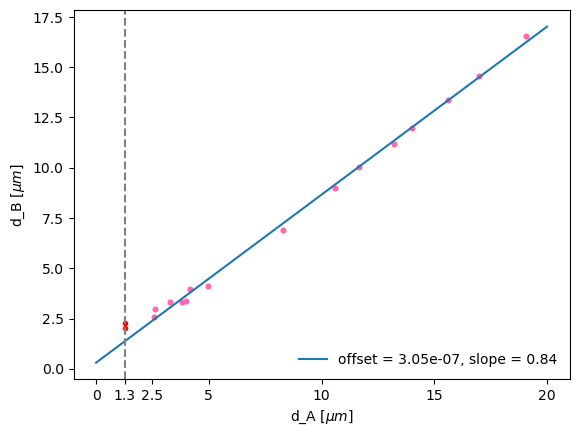

<Figure size 640x480 with 0 Axes>

In [95]:
#plot for dA and dB from the fit
def func_lin(x,a,b):
    return a+b*x

plt.plot(np.sort(np.array(dA_phi))*1e6, np.sort(np.array(dB_phi))*1e6 ,'.', color = 'red')
plt.plot(np.sort(np.array(dA_phi))[2:]*1e6, np.sort(np.array(dB_phi))[2:]*1e6 , '.', color = 'hotpink')
parameters, covariance = curve_fit(func_lin, np.sort(dA_phi)[2:], np.sort(dB_phi)[2:], p0=[0,1])


chi = 0
A = np.sort(dA_phi)[2:]
B = np.sort(dB_phi)[2:]
for i, el in enumerate(A):
    chi+=((B[i] - func_lin(el, parameters[0], parameters[1]))**2/ B[i])
print("chi squared of the fit equals")
print(chi)

plt.plot(np.linspace(0,20,100),func_lin(np.linspace(0,20,100)*1e-6,parameters[0], parameters[1])*1e6, label = 'offset = {:.2e}, slope = {:.2f}'.format(parameters[0], parameters[1]))
plt.axvline(min(dA_phi)*1e6, linestyle = '--',color = "gray" )
plt.xticks([0,min(dA_phi)*1e6, 2.5,5, 10, 15, 20],['0','{:.1f}'.format(min(dA_phi)*1e6), '2.5','5', '10', '15', '20'])

plt.xlabel('d_A [$\mu m$]')
plt.ylabel('d_B [$\mu m$]')
#plt.yscale('log')
#plt.xscale('log')
plt.legend(frameon=False)
plt.show()
plt.savefig(savedirectory+filename_all_theta + '.png')


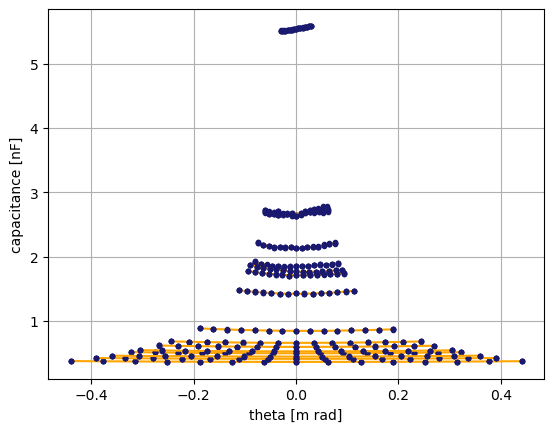

In [69]:

#put all plots into the same directory for theta
#then load the directory
loaddirectory_theta = '..//..//Data//alignment_data//nicedata//theta//' 
#list all files in the directory
files_theta = os.listdir(loaddirectory_theta)
#iterate over files
i=0
dA_theta = []
dB_theta = []
X_s_theta =[]
X_c_theta = []
ddA_theta = []
ddB_theta = []
for filename in files_theta:
    datatheta_i = np.transpose(np.load(loaddirectory_theta+filename))
    #just get the data to plot
    x1_i, x2_i, x3_i, theta_i, c_i, l_i, v_i = datatheta_i
    # print('x1_i', len(x1_i), x1_i)
    #fit for the data
    #fitting function
    def func(angle, A, B, angle_0):
        return A + B*(angle-angle_0)**2
    initial_guess = [0, 0, 0]

    #fit the data to the points
    parameters, covariance = curve_fit(func, theta_i, c_i, p0=initial_guess)

    #get fitted parameters
    A_fit_i, B_fit_i, angle_0_fit_i = parameters


    cA  = epsilon*math.pi*r**2
    cB = (epsilon*math.pi*r**4/4)**(1/3)

    dA_theta.append(cA/A_fit_i)
    dB_theta.append(cB/B_fit_i**(1/3))
    ddA_theta.append(cA/A_fit_i**2*np.sqrt(covariance[0,0]))
    ddB_theta.append(cB/(3*B_fit_i**(2/3))*np.sqrt(covariance[1,1]))


    plt.plot(theta_i*1e3, func(theta_i, A_fit_i, B_fit_i, angle_0_fit_i)*1e9, color = 'orange')

    plt.plot(theta_i*1e3, c_i*1e9,'.' ,color = 'midnightblue') #label= '${:.2f} \mu m $'.format(dA_theta[-1]*1e6)

    plt.xlabel('theta [m rad]')
    plt.ylabel('capacitance [nF]')
    #plt.yscale('log')
    # plt.legend()
    plt.grid()
   
    

    i+=1
plt.show()




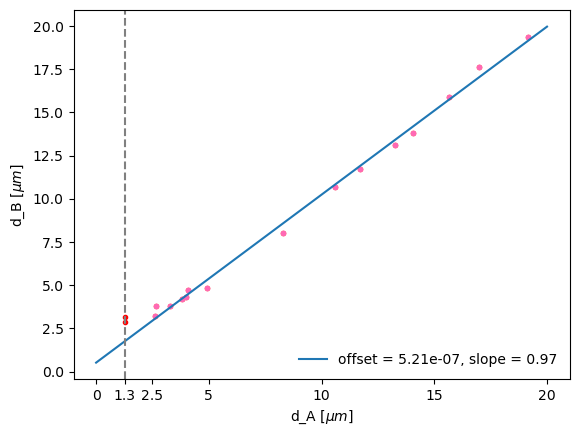

<Figure size 640x480 with 0 Axes>

In [84]:
#plot for dA and dB from the fit
def func_lin(x,a,b):
    return a+b*x

plt.plot(np.sort(np.array(dA_theta))*1e6, np.sort(np.array(dB_theta))*1e6 ,'.', color = 'red')
plt.plot(np.sort(np.array(dA_theta))[2:]*1e6, np.sort(np.array(dB_theta))[2:]*1e6 , '.', color = 'hotpink')
parameters, covariance = curve_fit(func_lin, np.sort(dA_theta)[2:], np.sort(dB_theta)[2:], p0=[0,1])
plt.plot(np.linspace(0,20,100),func_lin(np.linspace(0,20,100)*1e-6,parameters[0], parameters[1])*1e6, label = 'offset = {:.2e}, slope = {:.2f}'.format(parameters[0], parameters[1]))
plt.axvline(min(dA_theta)*1e6, linestyle = '--',color = "gray" )
plt.xticks([0,min(dA_theta)*1e6, 2.5,5, 10, 15, 20],['0','{:.1f}'.format(min(dA_theta)*1e6), '2.5','5', '10', '15', '20'])

plt.xlabel('d_A [$\mu m$]')
plt.ylabel('d_B [$\mu m$]')
#plt.yscale('log')
#plt.xscale('log')
plt.legend(frameon=False)
plt.show()
plt.savefig(savedirectory+filename_all_theta + '.png')


In [82]:
np.sort(np.array(dA_theta))[2:]

array([2.62731897e-06, 2.64140244e-06, 3.28196340e-06, 3.79008918e-06,
       3.96955009e-06, 4.09725842e-06, 4.91985464e-06, 8.27024806e-06,
       1.05976138e-05, 1.17075924e-05, 1.32589706e-05, 1.40424883e-05,
       1.56328568e-05, 1.69653905e-05, 1.91754111e-05])

In [83]:
np.sort(np.array(dB_theta))[2:]

array([3.21187082e-06, 3.77473137e-06, 3.80933232e-06, 4.20083766e-06,
       4.29361678e-06, 4.71958455e-06, 4.83173385e-06, 8.00399682e-06,
       1.06603093e-05, 1.17206328e-05, 1.31101913e-05, 1.38132211e-05,
       1.58766949e-05, 1.76280763e-05, 1.93418963e-05])